In [1]:
from mplsoccer import Pitch, VerticalPitch, Standardizer
from mplsoccer.dimensions import valid, size_varies, create_pitch_dims
import matplotlib.pyplot as plt
import numpy as np
import random
np.random.seed(42)
random.seed(42)

# Check random transform

Text(0.5, 0.98, 'from uefa to statsbomb')

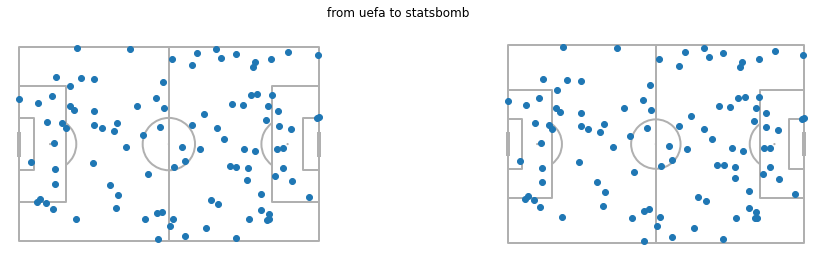

In [8]:
# from
pitch_type_from = np.random.choice(valid)
length_from = random.randint(a=90, b=115)
width_from = random.randint(a=55, b=75)
# to
pitch_type_to = np.random.choice(valid)
length_to = random.randint(a=90, b=115)
width_to = random.randint(a=55, b=75)
# pitches
pitch_from = Pitch(pitch_type=pitch_type_from, pitch_width=width_from, pitch_length=length_from)
pitch_to = Pitch(pitch_type=pitch_type_to, pitch_width=width_to, pitch_length=length_to)
# random points
x = np.random.uniform(low=pitch_from.dim.pitch_extent[0], high=pitch_from.dim.pitch_extent[1], size=100)
y = np.random.uniform(low=pitch_from.dim.pitch_extent[2], high=pitch_from.dim.pitch_extent[3], size=100)
# transform
standard = Standardizer(pitch_from=pitch_type_from, pitch_to=pitch_type_to,
                        length_from=length_from, width_from=width_from,
                        length_to=length_to, width_to=width_to,)
x_std, y_std = standard.transform(x, y)
# plot
fig, ax = plt.subplots(ncols=2, figsize=(16, 4))
pitch_from.draw(ax=ax[0])
pitch_to.draw(ax=ax[1])
pitch_from.scatter(x, y, ax=ax[0])
pitch_to.scatter(x_std, y_std, ax=ax[1])
fig.suptitle(f'from {pitch_type_from} to {pitch_type_to}')

# Check the reverse transform works

In [3]:
num_pitches = 1000
num_points = 100000
for i in range(num_pitches):
    # from
    pitch_type_from = np.random.choice(valid)
    length_from = random.randint(a=90, b=115)
    width_from = random.randint(a=55, b=75)
    # to
    pitch_type_to = np.random.choice(valid)
    length_to = random.randint(a=90, b=115)
    width_to = random.randint(a=55, b=75)
    # pitches
    standard = Standardizer(pitch_from=pitch_type_from, pitch_to=pitch_type_to,
                            length_from=length_from, width_from=width_from,
                            length_to=length_to, width_to=width_to,)
    # random points
    x = np.random.uniform(low=standard.dim_from.pitch_extent[0], high=standard.dim_from.pitch_extent[1], size=num_points)
    y = np.random.uniform(low=standard.dim_from.pitch_extent[2], high=standard.dim_from.pitch_extent[3], size=num_points)
    x_std, y_std = standard.transform(x, y)
    x_reverse, y_reverse = standard.transform(x_std, y_std, reverse=True)
    if np.abs(x - x_reverse).sum() > 0.0000001:
        print(f'Error: from {pitch_type_from} to {pitch_type_to}')
    if np.abs(y - y_reverse).sum() > 0.0000001:
        print(f'Error: from {pitch_type_from} to {pitch_type_to}')

# Shove 100,000 points through 1000 pitch transforms (ending at the original) and check the result approximately equal the original values

In [4]:
num_pitches = 1000
num_points = 100000
pitch_types = np.random.choice(valid, size=num_pitches)
pitch_types_shift = np.roll(pitch_types, shift=-1)
pitch_length = random.randint(a=90, b=115)
pitch_width = random.randint(a=55, b=75)
if pitch_types[0] in size_varies:
    dims = create_pitch_dims(pitch_types[0], pitch_width=pitch_width, pitch_length=pitch_length)
else:
    dims = create_pitch_dims(pitch_types[0])
x = np.random.uniform(low=dims.pitch_extent[0], high=dims.pitch_extent[1], size=num_points)
y = np.random.uniform(low=dims.pitch_extent[2], high=dims.pitch_extent[3], size=num_points)
x_copy = x.copy()
y_copy = y.copy()
# test
kwargs = {'width_from': pitch_width, 'length_from': pitch_length, 'width_to': pitch_width, 'length_to': pitch_length}
for i in range(num_pitches):
    pitch_from = pitch_types[i]
    pitch_to = pitch_types_shift[i]
    standard = Standardizer(pitch_from=pitch_from, pitch_to=pitch_to, **kwargs)
    x, y = standard.transform(x, y)
    
print('Should be a very small difference:', np.abs(x - x_copy).sum())
print('Should be a very small difference:', np.abs(y - y_copy).sum())

Should be a very small difference: 2.216648358898017e-09
Should be a very small difference: 1.9265416247981476e-09
